In [1]:
!pip uninstall -y statsmodels
!pip install statsmodels
# !pip uninstall -y sklearn
# !pip install sklearn

Found existing installation: statsmodels 0.10.2
Uninstalling statsmodels-0.10.2:
  Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 9.8 MB 5.2 MB/s 
     |████████████████████████████████| 233 kB 69.7 MB/s 
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1


In [ ]:
import sklearn

In [ ]:
sklearn.__version__

'0.22.2.post1'

In [3]:
!pip install pmdarima
!pip install dtaidistance

     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 1.1 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.3.2-cp37-cp37m-linux_x86_64.whl size=1586357 sha256=edb3ff69e26f0726f0ffadfb8dcc94aa857937a7e0c0cd5c8d575eece557ae99
  Stored in directory: /root/.cache/pip/wheels/5e/4a/9a/30f9efb3926e3c2f28231680685b36d0041466a33e4b8f8367
Successfully built dtaidistance


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pm

In [2]:
weather = pd.read_csv('/content/weather_data.csv', parse_dates=[1])
station = pd.read_csv('/content/station_info.csv')

In [3]:
weather_data = weather.merge(station, on='Station_ShortName')
weather_data.head()

,Station_ShortName,Weather_Date,AirTemp_Avg-degC,AirTemp_Avg_Flag,AirTemp_Min-degC,AirTemp_Min_Flag,AirTemp_Max-degC,AirTemp_Max_Flag,Humidity_Avg-%,Humidity_Avg_Flag,Humidity_Min-%,Humidity_Min_Flag,Humidity_Max-%,Humidity_Max_Flag,WindDir_Avg-deg,WindDir_Avg_Flag,WindSpd_Avg-m.s-1,WindSpd_Avg_Flag,WindSpd_Min-m.s-1,WindSpd_Min_Flag,WindSpd_Max-m.s-1,WindSpd_Max_Flag,Radiation-KJ-m-2,Radiation_Flag,Rainfall-mm,Rainfall_flag,ActualVapourPressure_Avg-kpa,ActualVapourPressure_Avg_Flag,DewPointTemp-degC,DewPointTemp_Flag,Name_Station,Latitude_DDNorth,Longitude_DDEast
0,NGA5001,1980-01-01,27.1,9.0,18.5,9.0,35.6,9.0,65.0,9.0,39.0,9.0,100.0,9.0,0.0,0.0,2.1,9.0,0.0,0.0,0.0,0.0,21000.0,9.0,0.0,9.0,2.35,9.0,19.9,9.0,Abuja,9.25,7.0
1,NGA5001,1980-01-02,27.0,9.0,17.8,9.0,36.3,9.0,69.0,9.0,39.0,9.0,100.0,9.0,0.0,0.0,2.1,9.0,0.0,0.0,0.0,0.0,20800.0,9.0,0.0,9.0,2.45,9.0,20.5,9.0,Abuja,9.25,7.0
2,NGA5001,1980-01-03,28.1,9.0,20.2,9.0,36.0,9.0,63.0,9.0,39.0,9.0,100.0,9.0,0.0,0.0,1.8,9.0,0.0,0.0,0.0,0.0,21000.0,9.0,0.0,9.0,2.41,9.0,20.3,9.0,Abuja,9.25,7.0
3,NGA5001,1980-01-04,27.0,9.0,18.3,9.0,35.8,9.0,64.0,9.0,38.0,9.0,100.0,9.0,0.0,0.0,1.7,9.0,0.0,0.0,0.0,0.0,21200.0,9.0,0.0,9.0,2.30,9.0,19.6,9.0,Abuja,9.25,7.0
4,NGA5001,1980-01-05,26.2,9.0,18.6,9.0,33.8,9.0,65.0,9.0,40.0,9.0,100.0,9.0,0.0,0.0,1.5,9.0,0.0,0.0,0.0,0.0,16600.0,9.0,0.0,9.0,2.20,9.0,18.8,9.0,Abuja,9.25,7.0


In [ ]:
weather_data['Station_ShortName'].value_counts()

NGA5012      11322
NGA5003      11322
NGA5002      11322
NGA5010      11322
NGA5004      11322
NGA5007      11322
NGA5013      11322
NGA5005      11322
NGA5009      11322
NGA5001      11322
NGA5011      11322
NGA5006      11322
NGA5014      11322
NGA5008      11322
NGA651000     4017
NGA3001       1759
Name: Station_ShortName, dtype: int64

In [ ]:
weather_data['Name_Station'].value_counts()

Lafia        13081
Ibi          11322
Sokoto       11322
Yelwa        11322
Nguru        11322
Kaduna       11322
Bida         11322
Makurdi      11322
Bauchi       11322
Kano         11322
Tillabery    11322
Lokoja       11322
Abuja        11322
Enugu        11322
Ibadan        4017
Name: Name_Station, dtype: int64

In [4]:
weather_data = weather_data.loc[weather_data['Station_ShortName'].str.startswith('NGA5')]
weather_data['Station_ShortName'].value_counts()

NGA5004    11322
NGA5009    11322
NGA5011    11322
NGA5013    11322
NGA5003    11322
NGA5006    11322
NGA5012    11322
NGA5014    11322
NGA5010    11322
NGA5005    11322
NGA5002    11322
NGA5007    11322
NGA5008    11322
NGA5001    11322
Name: Station_ShortName, dtype: int64

In [ ]:
Lafia = weather_data.loc[weather_data['Name_Station'] =='Lafia']
Ibi = weather_data.loc[weather_data['Name_Station'] =='Ibi']
Sokoto = weather_data.loc[weather_data['Name_Station'] =='Sokoto']
Yelwa = weather_data.loc[weather_data['Name_Station'] =='Yelwa']
Nguru = weather_data.loc[weather_data['Name_Station'] =='Nguru']
Kaduna = weather_data.loc[weather_data['Name_Station'] =='Kaduna']
Bida = weather_data.loc[weather_data['Name_Station'] =='Bida']
Makurdi = weather_data.loc[weather_data['Name_Station'] =='Makurdi']
Bauchi = weather_data.loc[weather_data['Name_Station'] =='Bauchi']
Kano = weather_data.loc[weather_data['Name_Station'] =='Kano']
Tillabery = weather_data.loc[weather_data['Name_Station'] =='Tillabery']
Lokoja = weather_data.loc[weather_data['Name_Station'] =='Lokoja']
Abuja = weather_data.loc[weather_data['Name_Station'] =='Abuja']
Enugu = weather_data.loc[weather_data['Name_Station'] =='Enugu']
Ibadan = weather_data.loc[weather_data['Name_Station'] =='Ibadan']

In [ ]:
flag_cols = [col for col in weather_data.columns if col.endswith('Flag')]
wind_cols = [col for col in weather_data.columns if col.startswith('Wind')]

means = weather_data.drop(columns = set(flag_cols+wind_cols+['Radiation-KJ-m-2', 'Station_ShortName', 'Latitude_DDNorth', 'Longitude_DDEast'])).groupby('Weather_Date').agg('mean')
# weather_data.groupby('Weather_Date').agg('mean')

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd49ac14f90>,
       dtype=object))

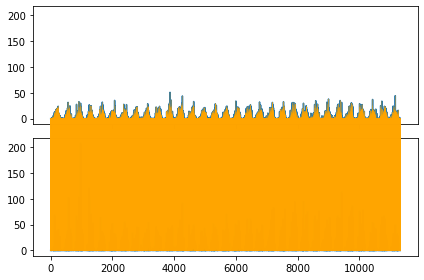

In [ ]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

path = dtw.warping_path_fast(means['Rainfall-mm'].to_numpy(), Abuja['Rainfall-mm'].to_numpy())

dtwvis.plot_warping(means['Rainfall-mm'].to_numpy(), Abuja['Rainfall-mm'].to_numpy(), path)

In [ ]:
flag_cols = [col for col in weather_data.columns if col.endswith('Flag')]
weather_data.drop(columns=flag_cols+['Station_ShortName','Latitude_DDNorth', 'Longitude_DDEast'], inplace=True)
weather_data.head()

,Weather_Date,AirTemp_Avg-degC,AirTemp_Min-degC,AirTemp_Max-degC,Humidity_Avg-%,Humidity_Min-%,Humidity_Max-%,WindDir_Avg-deg,WindSpd_Avg-m.s-1,WindSpd_Min-m.s-1,WindSpd_Max-m.s-1,Radiation-KJ-m-2,Rainfall-mm,Rainfall_flag,ActualVapourPressure_Avg-kpa,DewPointTemp-degC,Name_Station
0,1980-01-01,27.1,18.5,35.6,65.0,39.0,100.0,0.0,2.1,0.0,0.0,21000.0,0.0,9.0,2.35,19.9,Abuja
1,1980-01-02,27.0,17.8,36.3,69.0,39.0,100.0,0.0,2.1,0.0,0.0,20800.0,0.0,9.0,2.45,20.5,Abuja
2,1980-01-03,28.1,20.2,36.0,63.0,39.0,100.0,0.0,1.8,0.0,0.0,21000.0,0.0,9.0,2.41,20.3,Abuja
3,1980-01-04,27.0,18.3,35.8,64.0,38.0,100.0,0.0,1.7,0.0,0.0,21200.0,0.0,9.0,2.30,19.6,Abuja
4,1980-01-05,26.2,18.6,33.8,65.0,40.0,100.0,0.0,1.5,0.0,0.0,16600.0,0.0,9.0,2.20,18.8,Abuja


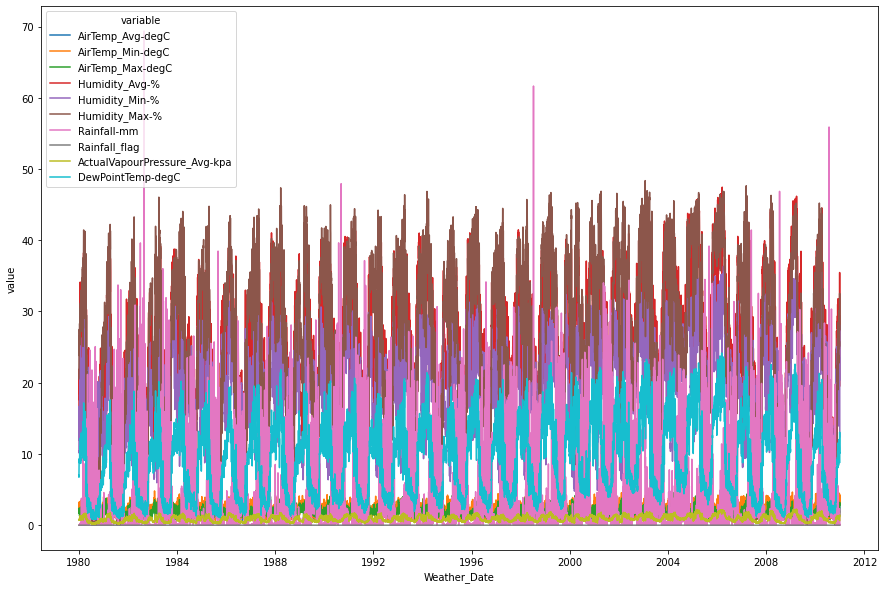

In [ ]:
import seaborn as sns

flag_cols = [col for col in weather_data.columns if col.endswith('Flag')]
wind_cols = [col for col in weather_data.columns if col.startswith('Wind')]

df = weather_data.drop(columns = set(flag_cols+wind_cols+['Radiation-KJ-m-2', 'Station_ShortName', 'Latitude_DDNorth', 'Longitude_DDEast']))
# sns.lineplot(data=df.melt(id_vars=['Weather_Date', 'Name_Station']), x='Weather_Date', y='value', hue='variable')
plt.figure(figsize=(15, 10))
sns.lineplot(data = df.drop(columns=['Name_Station']).groupby('Weather_Date').agg('std').melt(ignore_index=False).reset_index(), x='Weather_Date', y='value', hue='variable')
# sns.lineplot

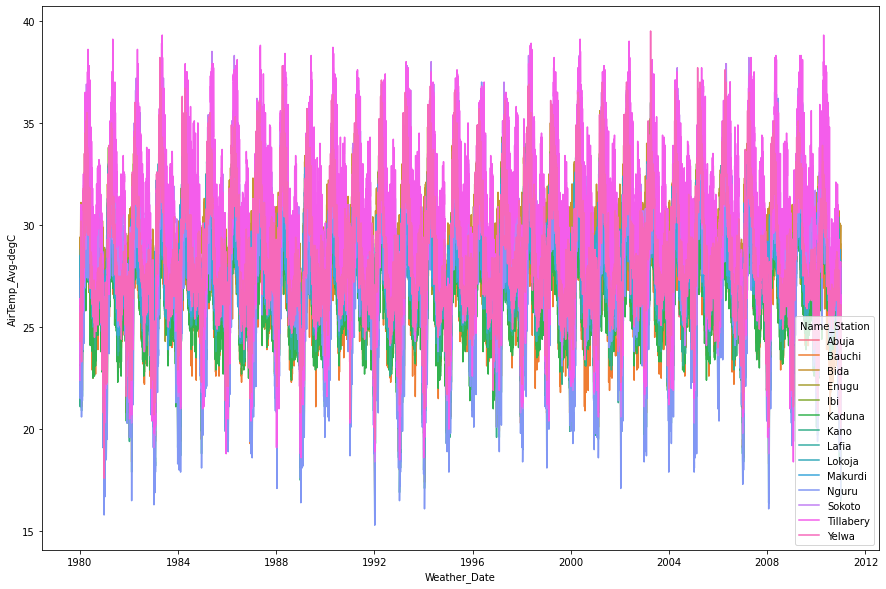

In [ ]:
plt.figure(figsize=(15, 10))
# sns.lineplot(data = df[['Rainfall-mm','Weather_Date']].groupby('Weather_Date').agg('std').reset_index(), x='Weather_Date', y='Rainfall-mm')
sns.lineplot(data = weather_data[['AirTemp_Avg-degC','Weather_Date','Name_Station']], x='Weather_Date', y='AirTemp_Avg-degC', hue='Name_Station')
# means = weather_data[['Rainfall-mm','Weather_Date']].groupby('Weather_Date').agg(['mean','std'])

# sns.lineplot(x=weather_data['Weather_Date'], y=(weather_data['Rainfall-mm'] - means.iloc[:,0])/means.iloc[:, 1] , hue=weather_data['Name_Station'])
# sns.lineplot(x=weather_data['Weather_Date'], y=np.log(weather_data['Rainfall-mm'], where=weather_data['Rainfall-mm']>0), hue=weather_data['Name_Station'])
# df[['Rainfall-mm']].groupby('Weather_Date').agg('std').reset_index()

In [ ]:
# weather_data[['Rainfall-mm','Weather_Date']].groupby('Weather_Date').agg(['mean','std']).iloc[:,0]
# weather_data[['Rainfall-mm','Weather_Date']].set_index('Weather_Date') - means.iloc[:,0]

In [ ]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

dist_mat = dtw.distance_matrix_fast(weather_data[['Weather_Date', 'Rainfall-mm', 'Name_Station']].pivot(columns='Weather_Date', index='Name_Station').to_numpy())

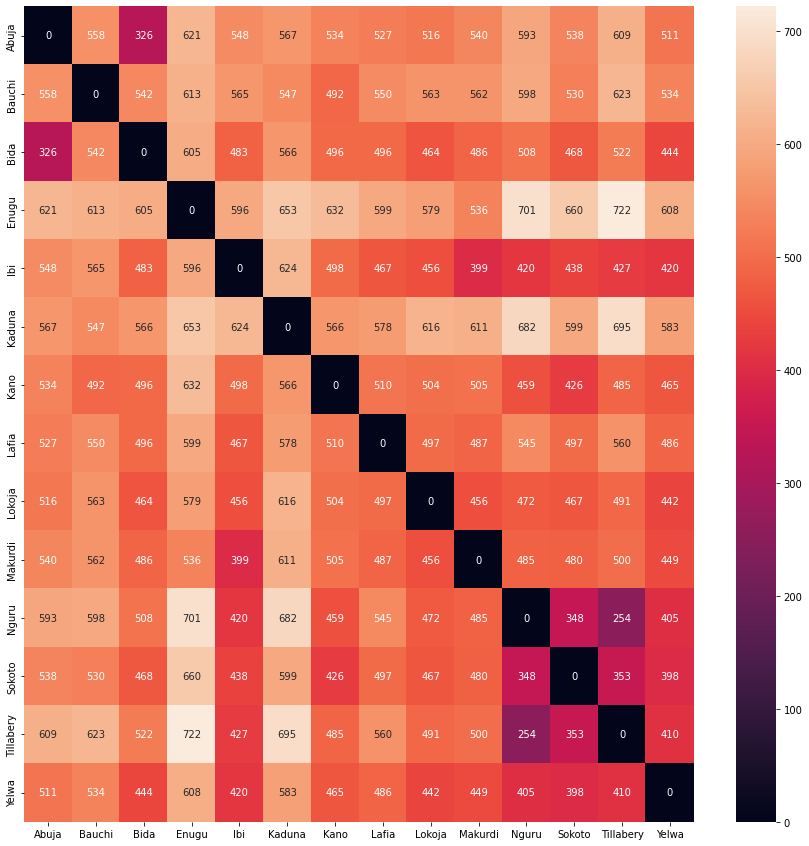

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(data=dist_mat, index=weather_data['Name_Station'].unique(), columns=weather_data['Name_Station'].unique()), annot=True, fmt=".0f");

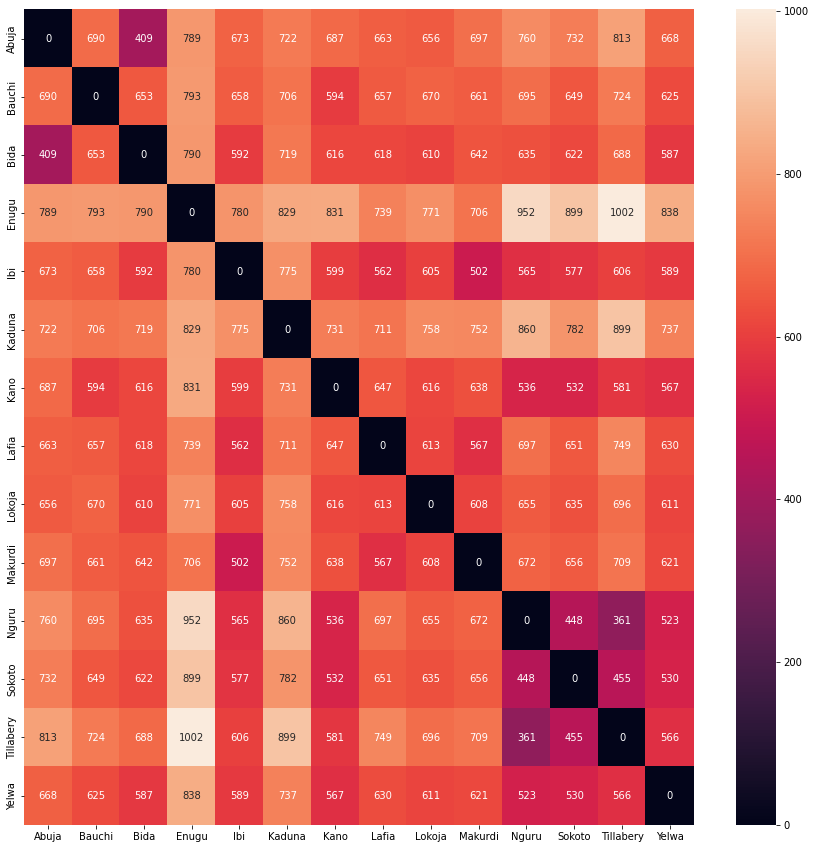

In [ ]:
df = weather_data[['Weather_Date', 'Rainfall-mm', 'Name_Station']].set_index('Weather_Date').pivot(columns='Name_Station').resample('W').sum().T.to_numpy()

plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(data=dtw.distance_matrix_fast(df), index=weather_data['Name_Station'].unique(), columns=weather_data['Name_Station'].unique()), annot=True, fmt=".0f");

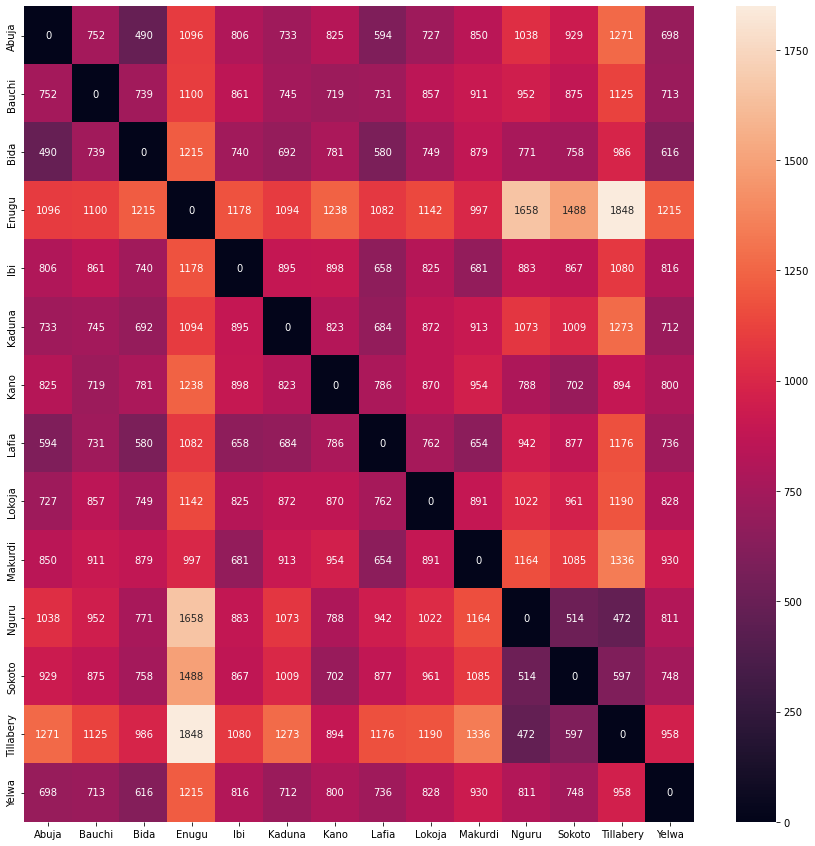

In [ ]:
df = weather_data[['Weather_Date', 'Rainfall-mm', 'Name_Station']].set_index('Weather_Date').pivot(columns='Name_Station').resample('M').sum().T.to_numpy()

plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(data=dtw.distance_matrix_fast(df), index=weather_data['Name_Station'].unique(), columns=weather_data['Name_Station'].unique()), annot=True, fmt=".0f");

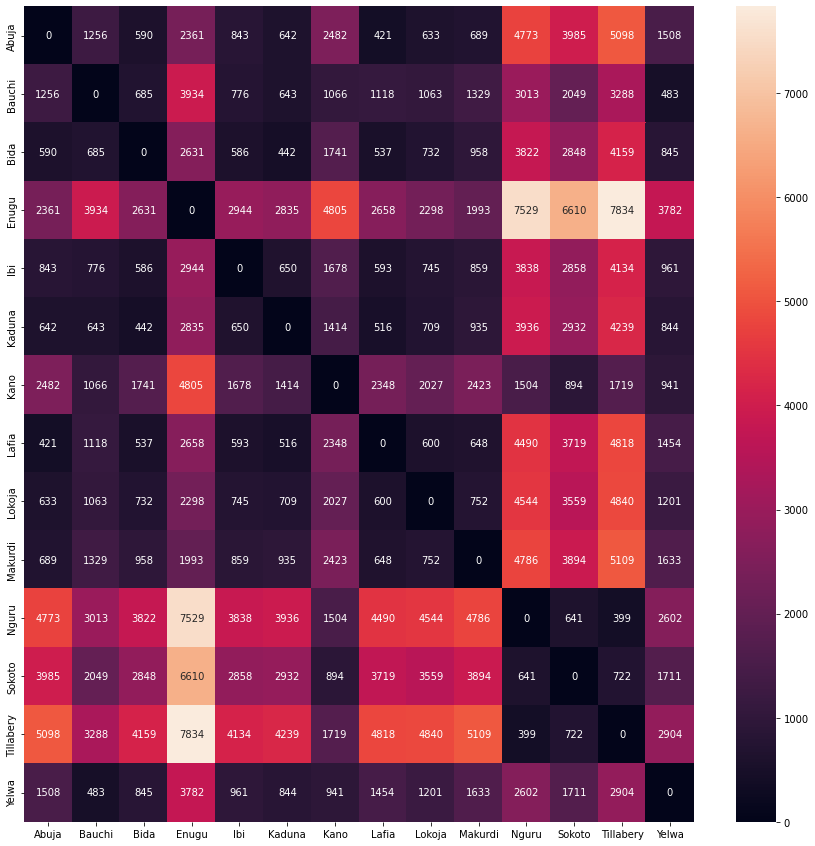

In [ ]:
df = weather_data[['Weather_Date', 'Rainfall-mm', 'Name_Station']].set_index('Weather_Date').pivot(columns='Name_Station').resample('Y').sum().T.to_numpy()

plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(data=dtw.distance_matrix_fast(df), index=weather_data['Name_Station'].unique(), columns=weather_data['Name_Station'].unique()), annot=True, fmt=".0f");

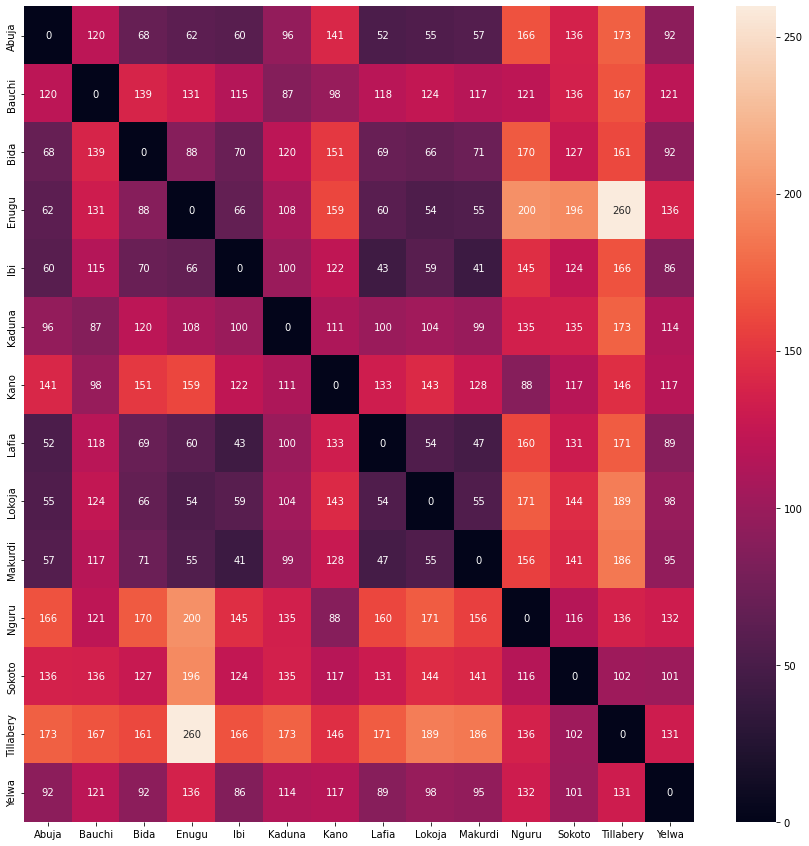

In [ ]:
dist_mat = dtw.distance_matrix_fast(weather_data[['Weather_Date', 'AirTemp_Avg-degC', 'Name_Station']].pivot(columns='Weather_Date', index='Name_Station').to_numpy())

plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(data=dist_mat, index=weather_data['Name_Station'].unique(), columns=weather_data['Name_Station'].unique()), annot=True, fmt=".0f");

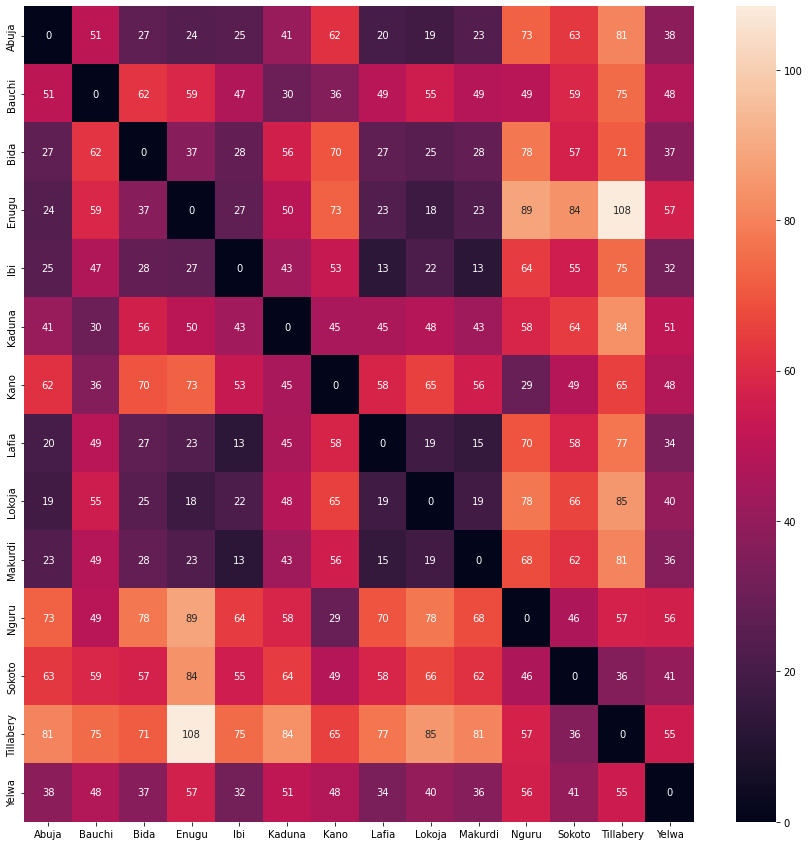

In [ ]:
df = weather_data[['Weather_Date', 'AirTemp_Avg-degC', 'Name_Station']].set_index('Weather_Date').pivot(columns='Name_Station').resample('W').mean().T.to_numpy()

plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(data=dtw.distance_matrix_fast(df), index=weather_data['Name_Station'].unique(), columns=weather_data['Name_Station'].unique()), annot=True, fmt=".0f");

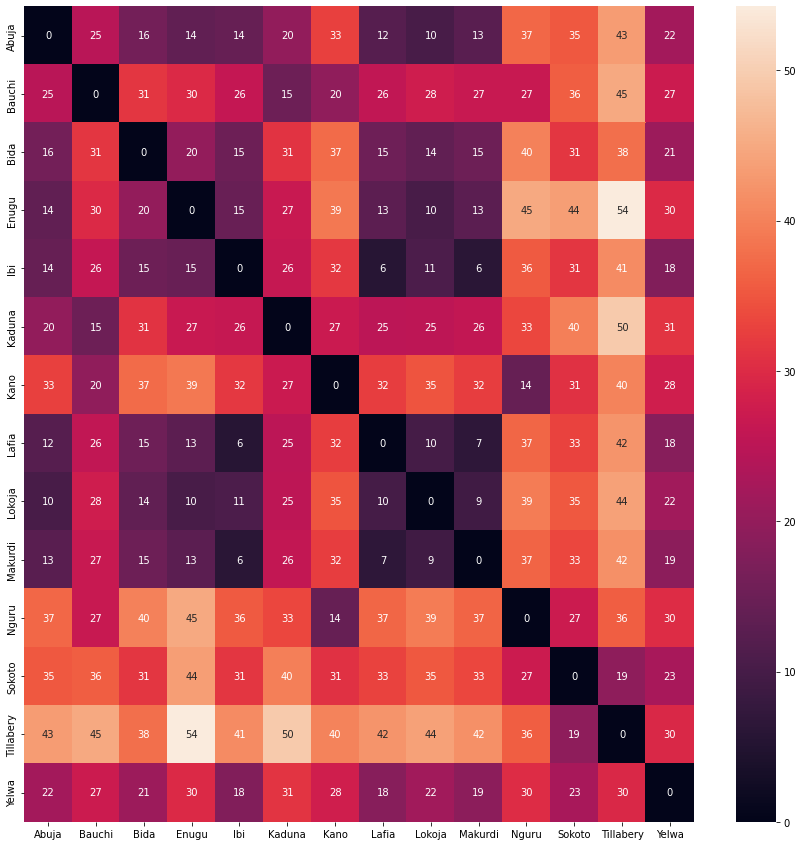

In [ ]:
df = weather_data[['Weather_Date', 'AirTemp_Avg-degC', 'Name_Station']].set_index('Weather_Date').pivot(columns='Name_Station').resample('M').mean().T.to_numpy()

plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(data=dtw.distance_matrix_fast(df), index=weather_data['Name_Station'].unique(), columns=weather_data['Name_Station'].unique()), annot=True, fmt=".0f");

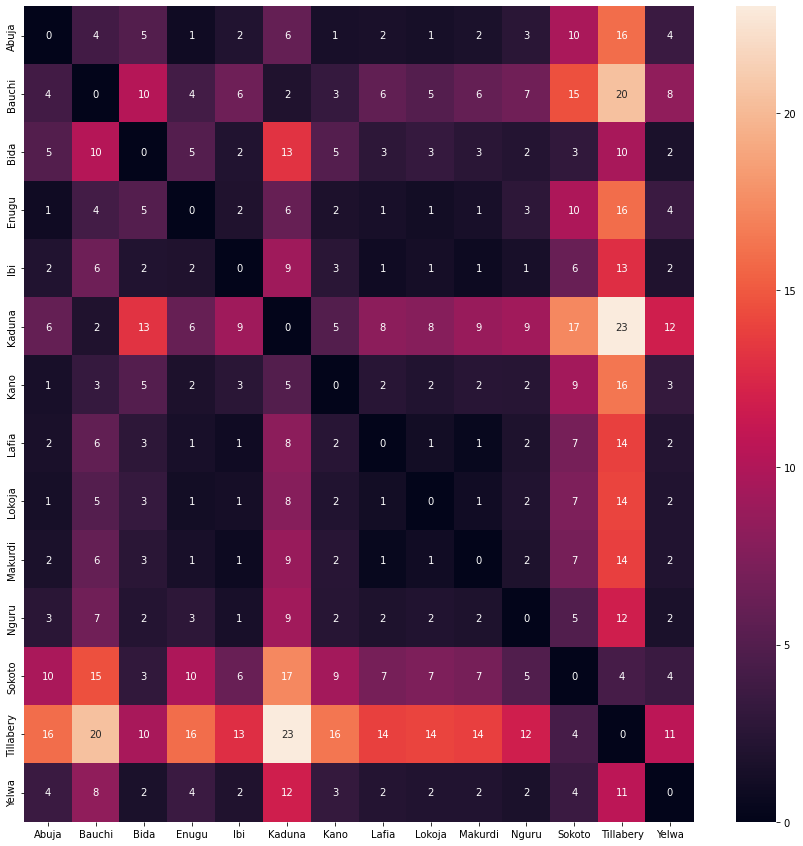

In [ ]:
df = weather_data[['Weather_Date', 'AirTemp_Avg-degC', 'Name_Station']].set_index('Weather_Date').pivot(columns='Name_Station').resample('Y').mean().T.to_numpy()

plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(data=dtw.distance_matrix_fast(df), index=weather_data['Name_Station'].unique(), columns=weather_data['Name_Station'].unique()), annot=True, fmt=".0f");

In [ ]:
Abuja.set_index('Weather_Date', inplace=True)

Abuja =  Abuja.reindex(pd.date_range(start=Abuja.index.min(), end=Abuja.index.max(), freq='D')).interpolate(method='time')
Abuja.index.name= 'Weather_Date'

In [ ]:
Bauchi.set_index('Weather_Date', inplace=True)

Bauchi =  Bauchi.reindex(pd.date_range(start=Bauchi.index.min(), end=Bauchi.index.max(), freq='D')).interpolate(method='time')
Bauchi.index.name= 'Weather_Date'

In [ ]:
Bida.set_index('Weather_Date', inplace=True)

Bida =  Bida.reindex(pd.date_range(start=Bida.index.min(), end=Bida.index.max(), freq='D')).interpolate(method='time')
Bida.index.name= 'Weather_Date'

In [ ]:
Enugu.set_index('Weather_Date', inplace=True)

Enugu = Enugu.reindex(pd.date_range(start=Enugu.index.min(), end=Enugu.index.max(), freq='D')).interpolate(method='time')
Enugu.index.name= 'Weather_Date'

In [ ]:
Ibi.set_index('Weather_Date', inplace=True)

Ibi = Ibi.reindex(pd.date_range(start=Ibi.index.min(), end=Ibi.index.max(), freq='D')).interpolate(method='time')
Ibi.index.name= 'Weather_Date'

In [ ]:
Kaduna.set_index('Weather_Date', inplace=True)

Kaduna = Kaduna.reindex(pd.date_range(start=Kaduna.index.min(), end=Kaduna.index.max(), freq='D')).interpolate(method='time')
Kaduna.index.name= 'Weather_Date'

In [ ]:
Kano.set_index('Weather_Date', inplace=True)

Kano = Kano.reindex(pd.date_range(start=Kano.index.min(), end=Kano.index.max(), freq='D')).interpolate(method='time')
Kano.index.name= 'Weather_Date'

In [ ]:
Lafia.set_index('Weather_Date', inplace=True)

Lafia = Lafia.reindex(pd.date_range(start=Lafia.index.min(), end=Lafia.index.max(), freq='D')).interpolate(method='time')
Lafia.index.name= 'Weather_Date'

In [ ]:
Lokoja.set_index('Weather_Date', inplace=True)

Lokoja = Lokoja.reindex(pd.date_range(start=Lokoja.index.min(), end=Lokoja.index.max(), freq='D')).interpolate(method='time')
Lokoja.index.name= 'Weather_Date'

In [ ]:
Makurdi.set_index('Weather_Date', inplace=True)

Makurdi = Abuja.reindex(pd.date_range(start=Makurdi.index.min(), end=Makurdi.index.max(), freq='D')).interpolate(method='time')
Makurdi.index.name= 'Weather_Date'

In [ ]:
Nguru.set_index('Weather_Date', inplace=True)

Nguru = Nguru.reindex(pd.date_range(start=Nguru.index.min(), end=Nguru.index.max(), freq='D')).interpolate(method='time')
Nguru.index.name= 'Weather_Date'

In [ ]:
Sokoto.set_index('Weather_Date', inplace=True)

Sokoto = Sokoto.reindex(pd.date_range(start=Sokoto.index.min(), end=Sokoto.index.max(), freq='D')).interpolate(method='time')
Sokoto.index.name= 'Weather_Date'

In [ ]:
Tillabery.set_index('Weather_Date', inplace=True)

Tillabery = Tillabery.reindex(pd.date_range(start=Tillabery.index.min(), end=Tillabery.index.max(), freq='D')).interpolate(method='time')
Tillabery.index.name= 'Weather_Date'

In [ ]:
Yelwa.set_index('Weather_Date', inplace=True)

Yelwa = Yelwa.reindex(pd.date_range(start=Yelwa.index.min(), end=Yelwa.index.max(), freq='D')).interpolate(method='time')
Yelwa.index.name= 'Weather_Date'

In [ ]:
# means.set_index('Weather_Date')

means =  means.reindex(pd.date_range(start=means.index.min(), end=means.index.max(), freq='D')).interpolate(method='time')
means.index.name= 'Weather_Date'

In [ ]:
px.line(data_frame=means['Rainfall-mm'].resample('M').sum().reset_index(), x='Weather_Date', y='Rainfall-mm')

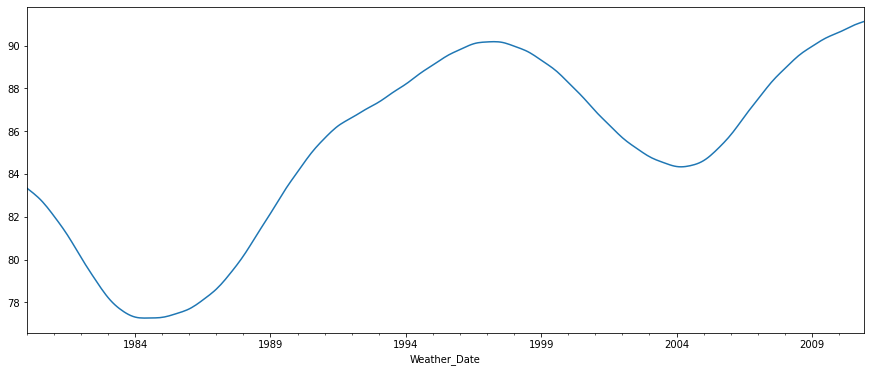

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

cycle, trend =hpfilter(means['Rainfall-mm'].resample('M').sum(), lamb=129600 )
trend.plot(figsize=(15,6)).autoscale(axis='x', tight=True)

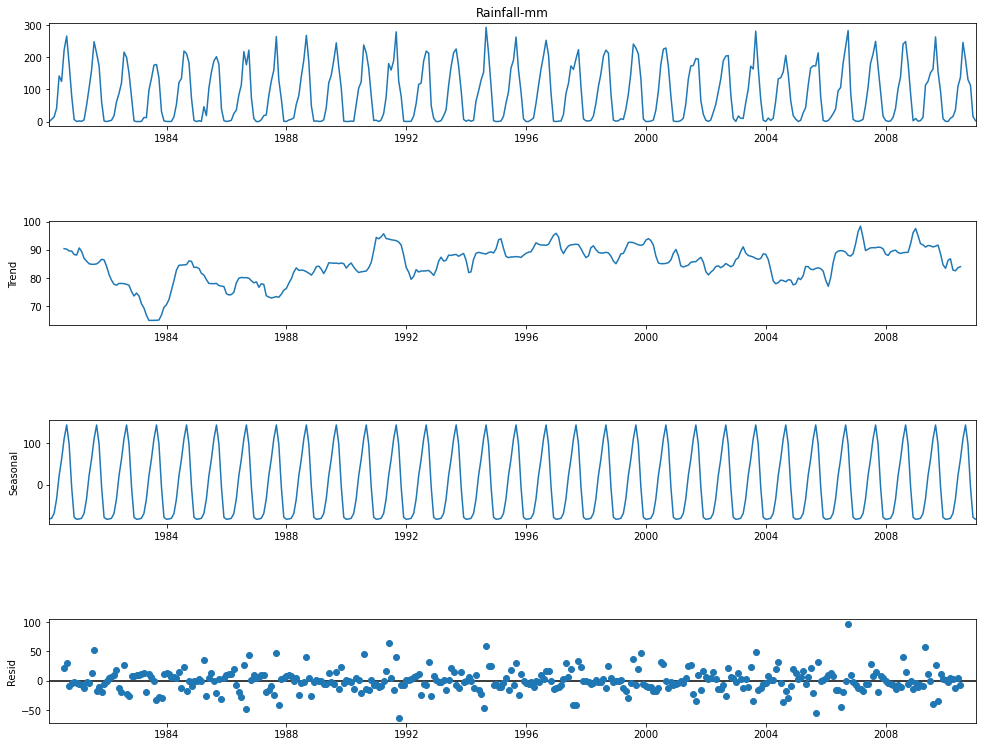

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(means['Rainfall-mm'].resample('M').sum(), model = 'add')
# plt.figure(figsize=(10,6))
fig = result.plot();
fig.set_size_inches((15,12))

In [7]:
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

def timeseries_evaluation_metrics_func(y_true, y_pred):
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
  print('Evaluation metrics result:')
  # print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
  print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
  print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
  # print(f'MAPE is : {metrics.mean_absolute_percentage_error(y_true, y_pred)}')
  print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
  print(f'R2 is : {metrics.r2_score(y_true, y_pred)}', end='\n\n')


def Augmented_Dickey_Fuller_Test_func(series, column_name):
  print(f'Results of Dickey-Fuller Test for column: {column_name}')
  dftest = adfuller(series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No Lags Used', 'Number of Obs Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)
  if dftest[1] <= 0.05:
    print('Conclusion:====>')
    print('Reject the null hypothesis')
    print('Data is stationary')
  else:
    print('Conclusion:====>')
    print('Fail to reject the null hypothesis')
    print('Data is non-stationary')

In [19]:
temp['Name_Station'] = temp['Name_Station'].astype('category')

In [30]:
train.head()

,Rainfall-mm,Name_Station_Abuja,Name_Station_Bauchi,Name_Station_Bida,Name_Station_Enugu,Name_Station_Ibi,Name_Station_Kaduna,Name_Station_Kano,Name_Station_Lafia,Name_Station_Lokoja,Name_Station_Makurdi,Name_Station_Nguru,Name_Station_Sokoto,Name_Station_Tillabery,Name_Station_Yelwa
Weather_Date,,,,,,,,,,,,,,,
1980-01-31,0.016129,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1980-02-29,0.096552,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1980-03-31,0.161290,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1980-04-30,0.650000,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1980-05-31,7.632258,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
temp = weather_data.loc[:,['Name_Station','Weather_Date', 'Rainfall-mm']]
temp['Name_Station'] = temp['Name_Station'].astype('category')
temp = temp.groupby('Name_Station').apply(lambda x: x.set_index('Weather_Date').resample('M').mean()).reset_index(level=0)

train_dfs = []
test_dfs = []
def make_train_test(x):
  train_dfs.append(x[:-24])
  test_dfs.append(x[-24:])
  return x

temp = temp.groupby('Name_Station').apply(lambda x: make_train_test(x))

train = pd.concat(train_dfs)
train = pd.get_dummies(train, columns=['Name_Station'])

In [ ]:
stepwise_fit = pm.auto_arima(train['Rainfall-mm'], X=train.drop(columns='Rainfall-mm'), start_p=0, start_q=0,
    max_p=8, max_q=8, seasonal=True, start_P=0,
    start_Q=0, max_P=8, max_D=8, max_Q=8, m=12,
    d=None, D=None, trace=True, error_action='ignore', 
    suppress_warnings=True,
    stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=24815.066, Time=0.75 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=18826.671, Time=54.43 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=21019.024, Time=23.38 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=24813.066, Time=5.14 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=21927.371, Time=3.70 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=136.76 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=16855.100, Time=64.25 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=20659.085, Time=22.41 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=16843.288, Time=146.81 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=16853.033, Time=241.65 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=16845.755, Time=152.26 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=16844.659, Time=164.61 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=inf, Time=231.04 sec
 ARIMA(1,0,0)(3,0,2)[12] intercept   : AIC=16845.609, Time=258.29 sec

In [ ]:
train = Abuja['Rainfall-mm'].resample('M').sum().iloc[:-24]
test = Abuja['Rainfall-mm'].resample('M').sum().iloc[-24:]

stepwise_fit = pm.auto_arima(train, start_p=0, start_q=0,
    max_p=8, max_q=8, seasonal=True, start_P=0,
    start_Q=0, max_P=8, max_D=8, max_Q=8, m=12,
    d=None, D=None, trace=True, error_action='ignore', 
    suppress_warnings=True,
    stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4234.428, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3880.568, Time=0.75 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4477.957, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=4025.623, Time=0.23 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=3584.205, Time=1.65 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=3613.198, Time=1.04 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=inf, Time=4.47 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=3583.547, Time=4.46 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=3800.413, Time=2.44 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=inf, Time=5.09 sec
 ARIMA(0,0,1)(1,0,3)[12] intercept   : AIC=3729.140, Time=10.19 sec
 ARIMA(0,0,1)(0,0,3)[12] intercept   : AIC=3762.791, Time=6.02 sec
 ARIMA(0,0,1)(2,0,3)[12] intercept   : AIC=inf, Time=14.62 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   

In [32]:
stepwise_fit.summary()

NameError: ignored

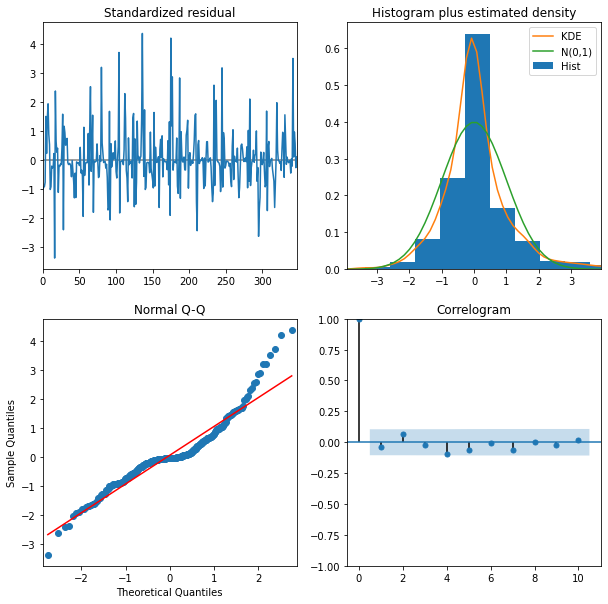

In [ ]:
stepwise_fit.plot_diagnostics(figsize=(10,10));

In [ ]:
# stepwise_fit.pre

In [ ]:
forecast, conf_int = stepwise_fit.predict(n_periods=24, return_conf_int=True)

forecast = pd.DataFrame(forecast, columns=['pred'])
df_conf = pd.DataFrame(conf_int, columns=['Upper_bound', 'Lower_bound'])
df_conf['new_index'] = test.index
df_conf.set_index('new_index', inplace = True)

timeseries_evaluation_metrics_func(test, forecast)

Evaluation metrics result:
MAE is : 34.06163721630512
RMSE is : 55.0847583058723
MAPE is : inf
R2 is : 0.7703473049022859



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning:

divide by zero encountered in true_divide



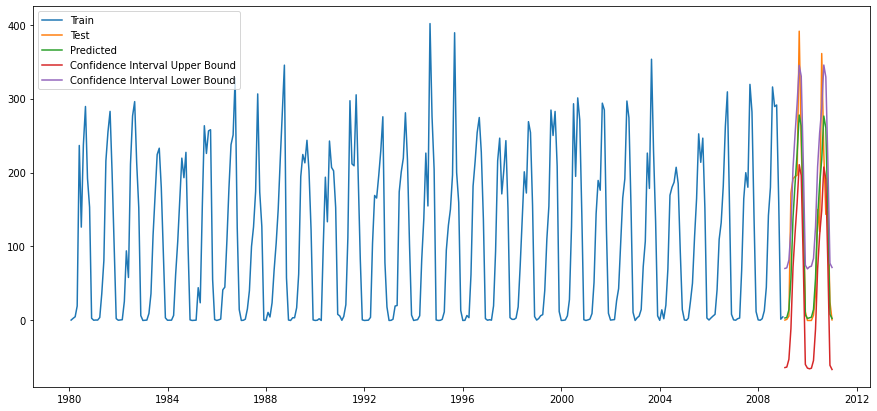

In [ ]:
forecast['new_index'] = test.index
forecast.set_index('new_index', inplace=True)

plt.rcParams['figure.figsize'] = [15,7]
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Predicted')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper Bound')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower Bound')
plt.legend(loc='best')
# plt.show()

In [5]:
import tensorflow as tf
from tensorflow.keras import layers

# df = weather_data.loc[:,['Weather_Date', 'Name_Station', 'Rainfall-mm']]
# df['Day_sin'] = np.sin(df['Weather_Date'].dt.dayofyear*(2*np.pi/365.25))
# df['Day_cos'] = np.cos(df['Weather_Date'].dt.dayofyear*(2*np.pi/365.25))
# df['Year_norm'] = (df['Weather_Date'].dt.year - 1980)/40

# df.drop(columns='Weather_Date', inplace=True)

In [6]:
temp = weather_data.loc[:,['Name_Station','Weather_Date', 'Rainfall-mm']]
temp['Name_Station'] = temp['Name_Station'].astype('category')


train_dfs = []
test_dfs = []
def make_train_test(x):
  train_dfs.append(x[:-24])
  test_dfs.append(x[-24:])
  return x

temp = temp.groupby('Name_Station').apply(lambda x: make_train_test(x))

train = pd.concat(train_dfs)
# train = pd.get_dummies(train, columns=['Name_Station'])

In [13]:
train.groupby('Name_Station').apply(lambda x: None)

""


In [ ]:
tr_rain_mean = train['Rainfall-mm'].mean()
tr_rain_std = train['Rainfall-mm'].std()

def make_dataset(x, window, forecast):
  x = x.copy()
  x['Rainfall-mm'] = (x['Rainfall-mm']-tr_rain_mean)/tr_rain_std
  x['Day_sin'] = np.sin(x['Weather_Date'].dt.dayofyear*(2*np.pi/365.25))
  x['Day_cos'] = np.cos(x['Weather_Date'].dt.dayofyear*(2*np.pi/365.25))
  x['Year_norm'] = (x['Weather_Date'].dt.year - 1980)/40

  x.drop(columns='Weather_Date', inplace=True)

  labels = []
  seq_inputs = []
  den_inputs = []
  inp_1 = x

In [ ]:
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]


# train_mean = train_df.mean()
# train_std = train_df.std()

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=512):
  dataframe = dataframe.copy()
  dataframe['Day_sin'] = np.sin(df['Weather_Date'].dt.dayofyear*(2*np.pi/365.25))
  dataframe['Day_cos'] = np.cos(df['Weather_Date'].dt.dayofyear*(2*np.pi/365.25))
  dataframe['Year_norm'] = (df['Weather_Date'].dt.year - 1980)/40

  dataframe.drop(columns='Weather_Date', inplace=True)
  labels = dataframe.pop('Rainfall-mm')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

def get_normalization_layer(name, dataset):
  # Create a Normalization layer for our feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields our feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  # Create a StringLookup layer which will turn strings into integer indices
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)

  # Prepare a Dataset that only yields our feature
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the set of possible values and assign them a fixed integer index.
  index.adapt(feature_ds)

  # Create a Discretization for our integer indices.
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  # Apply one-hot encoding to our indices. The lambda function captures the
  # layer so we can use them, or include them in the functional model later.
  return lambda feature: encoder(index(feature))

In [ ]:
batch_size = 512
train_ds = df_to_dataset(train_df, batch_size=batch_size)
val_ds = df_to_dataset(val_df, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test_df, shuffle=False, batch_size=batch_size)

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
all_inputs = []
encoded_features = []

# Numeric features.
for header in ['Day_sin', 'Day_cos', 'Year_norm']:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

# Categorical features encoded as string.
categorical_cols = ['Name_Station']
for header in categorical_cols:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
  encoding_layer = get_category_encoding_layer(header, train_ds, dtype='string',
                                               max_tokens=5)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

In [ ]:
all_features = tf.keras.layers.concatenate(encoded_features)

In [ ]:
weather_data[['Weather_Date', 'Rainfall-mm', 'Name_Station']].pivot(columns='Weather_Date', index='Name_Station').to_numpy().shape

(14, 11322)

In [ ]:
from scipy import stats

means = weather_data[['Rainfall-mm', 'Weather_Date']].groupby('Weather_Date').agg('mean')
for station in weather_data['Name_Station'].unique():
  print(stats.ks_2samp(weather_data.loc[weather_data['Name_Station'] ==station,'Rainfall-mm' ], means.squeeze()))
# means.squeeze().shape
# weather_data.loc[weather_data['Name_Station'] ==station,['Rainfall-mm'] ].shape

Ks_2sampResult(statistic=0.3548842960607667, pvalue=0.0)
Ks_2sampResult(statistic=0.45433668963080726, pvalue=0.0)
Ks_2sampResult(statistic=0.35629747394453276, pvalue=0.0)
Ks_2sampResult(statistic=0.20623564741211803, pvalue=1.4523673917518155e-209)
Ks_2sampResult(statistic=0.2986221515633281, pvalue=0.0)
Ks_2sampResult(statistic=0.4381734675852323, pvalue=0.0)
Ks_2sampResult(statistic=0.4877230171347819, pvalue=0.0)
Ks_2sampResult(statistic=0.34649355237590534, pvalue=0.0)
Ks_2sampResult(statistic=0.27018194665253487, pvalue=0.0)
Ks_2sampResult(statistic=0.28086910439851615, pvalue=0.0)
Ks_2sampResult(statistic=0.5080374492139199, pvalue=0.0)
Ks_2sampResult(statistic=0.4842783960431019, pvalue=0.0)
Ks_2sampResult(statistic=0.50688924218336, pvalue=0.0)
Ks_2sampResult(statistic=0.37917329093799684, pvalue=0.0)


In [ ]:
weather_data.drop(columns=['Name_Station']).groupby('Weather_Date').agg('std')

,AirTemp_Avg-degC,AirTemp_Min-degC,AirTemp_Max-degC,Humidity_Avg-%,Humidity_Min-%,Humidity_Max-%,WindDir_Avg-deg,WindSpd_Avg-m.s-1,WindSpd_Min-m.s-1,WindSpd_Max-m.s-1,Radiation-KJ-m-2,Rainfall-mm,Rainfall_flag,ActualVapourPressure_Avg-kpa,DewPointTemp-degC
Weather_Date,,,,,,,,,,,,,,,
1980-01-01,2.396747,2.694286,2.266005,16.032933,10.358412,20.560818,0.0,0.889993,0.0,0.0,2995.500288,0.000000,0.0,0.710238,6.983894
1980-01-02,2.042529,2.346063,2.269434,16.247400,10.150516,20.758157,0.0,1.040102,0.0,0.0,3716.823943,0.000000,0.0,0.679428,6.734836
1980-01-03,2.172012,2.676239,1.766725,17.706397,12.005493,22.469515,0.0,1.074684,0.0,0.0,1164.610957,0.000000,0.0,0.764865,7.412226
1980-01-04,2.227747,2.855542,1.853360,20.383278,14.465761,24.531769,0.0,1.068222,0.0,0.0,1310.230246,0.000000,0.0,0.869480,8.619248
1980-01-05,2.176346,3.159288,1.636466,21.925949,16.698523,26.569110,0.0,1.249373,0.0,0.0,1623.860547,0.000000,0.0,0.871911,9.312440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-26,2.160294,3.727983,1.290626,30.302867,24.509698,25.312986,0.0,0.558058,0.0,0.0,1585.597956,2.325173,0.0,1.248092,10.071636
2010-12-27,1.741731,3.004283,1.445132,32.424130,25.975898,28.146887,0.0,0.630890,0.0,0.0,2210.066878,0.000000,0.0,1.277664,10.825641
2010-12-28,2.238192,3.681316,1.282854,35.469612,28.110946,32.533668,0.0,1.262585,0.0,0.0,2334.641182,0.000000,0.0,1.436742,13.061345
